In [7]:
import pandas as pd
data = pd.read_csv('raw_cooking_gas_survey_data.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                5000 non-null   object
 1   Email               5000 non-null   object
 2   Phone               5000 non-null   int64 
 3   Gender              5000 non-null   object
 4   County              5000 non-null   object
 5   Household Size      5000 non-null   int64 
 6   Residence Category  5000 non-null   object
 7   Cylinder Size       5000 non-null   object
 8   Delivery Time       5000 non-null   object
 9   Other Fuel Usage    4241 non-null   object
 10  Average Usage Days  5000 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 429.8+ KB


In [9]:
data.head()

,Name,Email,Phone,Gender,County,Household Size,Residence Category,Cylinder Size,Delivery Time,Other Fuel Usage,Average Usage Days
0,Daniel Omondi,daniel.omondi51@gmail.com,254701815908,Male,Meru,2,Business,13kg,Morning,Charcoal,122
1,Robert Njoroge,robert.njoroge29@gmail.com,254790996030,Male,Elgeyo Marakwet,3,Bedsitter,13kg,Evening,Charcoal,112
2,Lilian Mutua,lilian.mutua48@gmail.com,254718190937,Male,Kajiado,7,Bedsitter,13kg,Afternoon,Charcoal,34
3,Esther Kimani,esther.kimani74@gmail.com,254748757491,Male,Garissa,7,House,13kg,Morning,NaN,126
4,John Kibet,john.kibet74@gmail,254755597971,Female,Kisumu,5,Business,13kg,Morning,Charcoal,91


In [10]:
data.isna().sum()

Name                    0
Email                   0
Phone                   0
Gender                  0
County                  0
Household Size          0
Residence Category      0
Cylinder Size           0
Delivery Time           0
Other Fuel Usage      759
Average Usage Days      0
dtype: int64

In [26]:
def segment_usage(days):
    if days <= 45:
        return "Heavy Users"
    elif 46 <= days <= 90:
        return "Regular Users"
    elif 91 <= days <= 120:
        return "Low Users"
    else:
        return "At-Risk"


In [28]:
data['Usage Segment'] = data['Average Usage Days'].apply(segment_usage)

In [29]:
print(data[['Average Usage Days', 'Usage Segment']].head())

   Average Usage Days Usage Segment
0                 122       At-Risk
1                 112     Low Users
2                  34   Heavy Users
3                 126       At-Risk
4                  91     Low Users


In [30]:
print(data['Other Fuel Usage'].isna().sum())

759


In [31]:
data['Other Fuel Usage'] = data['Other Fuel Usage'].fillna("None")

In [32]:
print(data['Other Fuel Usage'].isna().sum()) 

0


In [38]:
data['Email'] = data['Email'].str.replace(' ', '', regex=False).str.lower()

In [39]:
email_pattern = r'^[\w\.-]+@[\w\.-]+\.\w+$'

In [40]:
data['is_valid_email'] = data['Email'].str.match(email_pattern)

In [41]:
bad_emails = data[data['is_valid_email'] == False]

In [47]:
bad_emails.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 4 to 4991
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                292 non-null    object
 1   Email               292 non-null    object
 2   Phone               292 non-null    int64 
 3   Gender              292 non-null    object
 4   County              292 non-null    object
 5   Household Size      292 non-null    int64 
 6   Residence Category  292 non-null    object
 7   Cylinder Size       292 non-null    object
 8   Delivery Time       292 non-null    object
 9   Other Fuel Usage    292 non-null    object
 10  Average Usage Days  292 non-null    int64 
 11  is_valid_email      292 non-null    bool  
 12  Usage Segment       292 non-null    object
dtypes: bool(1), int64(3), object(9)
memory usage: 29.9+ KB


In [48]:
bad_emails.head()

,Name,Email,Phone,Gender,County,Household Size,Residence Category,Cylinder Size,Delivery Time,Other Fuel Usage,Average Usage Days,is_valid_email,Usage Segment
4,John Kibet,john.kibet74@gmail,254755597971,Female,Kisumu,5,Business,13kg,Morning,Charcoal,91,False,Low Users
78,Ruth Maina,ruth.maina44@gmail,254764054405,Male,Nyamira,10,Business,50kg,Evening,Electricity,60,False,Regular Users
131,Michael Muriuki,michael.muriuki44gmail.com,254752399481,Male,Kakamega,8,Bedsitter,13kg,Evening,Electricity,115,False,Low Users
138,James Otieno,james.otieno40gmail.com,254780461900,Male,Isiolo,8,Bedsitter,50kg,Evening,Firewood,132,False,At-Risk
145,Peter Karanja,"peter.karanja81@gmail.com,",254793478337,Male,Kajiado,5,Business,13kg,Afternoon,Firewood,73,False,Regular Users


In [56]:
bad_emails = bad_emails.drop(columns=['is_valid_email'])

In [58]:
bad_emails.head()

,Name,Email,Phone,Gender,County,Household Size,Residence Category,Cylinder Size,Delivery Time,Other Fuel Usage,Average Usage Days,Usage Segment
4,John Kibet,john.kibet74@gmail,254755597971,Female,Kisumu,5,Business,13kg,Morning,Charcoal,91,Low Users
78,Ruth Maina,ruth.maina44@gmail,254764054405,Male,Nyamira,10,Business,50kg,Evening,Electricity,60,Regular Users
131,Michael Muriuki,michael.muriuki44gmail.com,254752399481,Male,Kakamega,8,Bedsitter,13kg,Evening,Electricity,115,Low Users
138,James Otieno,james.otieno40gmail.com,254780461900,Male,Isiolo,8,Bedsitter,50kg,Evening,Firewood,132,At-Risk
145,Peter Karanja,"peter.karanja81@gmail.com,",254793478337,Male,Kajiado,5,Business,13kg,Afternoon,Firewood,73,Regular Users


In [59]:
data = data.drop(columns = ['is_valid_email'])

In [65]:
data.head()

,Name,Email,Phone,Gender,County,Household_Size,Residence_Category,Cylinder_Size,Delivery_Time,Other_Fuel_Usage,Average_Usage_Days,Usage_Segment
0,Daniel Omondi,daniel.omondi51@gmail.com,254701815908,Male,Meru,2,Business,13kg,Morning,Charcoal,122,At-Risk
1,Robert Njoroge,robert.njoroge29@gmail.com,254790996030,Male,Elgeyo Marakwet,3,Bedsitter,13kg,Evening,Charcoal,112,Low Users
2,Lilian Mutua,lilian.mutua48@gmail.com,254718190937,Male,Kajiado,7,Bedsitter,13kg,Afternoon,Charcoal,34,Heavy Users
3,Esther Kimani,esther.kimani74@gmail.com,254748757491,Male,Garissa,7,House,13kg,Morning,None,126,At-Risk
4,John Kibet,john.kibet74@gmail,254755597971,Female,Kisumu,5,Business,13kg,Morning,Charcoal,91,Low Users


In [64]:
data = data.rename(columns = {
    'Household Size': 'Household_Size',
    'Residence Category': 'Residence_Category',
    'Cylinder Size': 'Cylinder_Size',
    'Delivery Time' : 'Delivery_Time',
    'Other Fuel Usage' : 'Other_Fuel_Usage',
    'Average Usage Days' : 'Average_Usage_Days',
    'Usage Segment' : 'Usage_Segment'
})

In [77]:
bad_emails = bad_emails.rename(columns = {
    'Household Size': 'Household_Size',
    'Residence Category': 'Residence_Category',
    'Cylinder Size': 'Cylinder_Size',
    'Delivery Time' : 'Delivery_Time',
    'Other Fuel Usage' : 'Other_Fuel_Usage',
    'Average Usage Days' : 'Average_Usage_Days',
    'Usage Segment' : 'Usage_Segment'
})

In [66]:
phone_pattern = r'^2547\d{8}$'

In [71]:
bad_emails['Phone'].astype(str).str.strip().str.match(phone_pattern).sum()

np.int64(292)

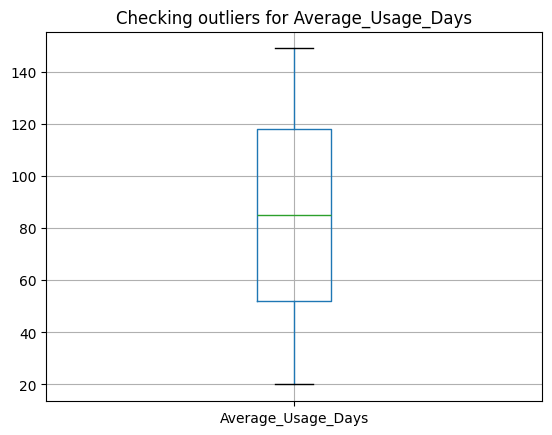

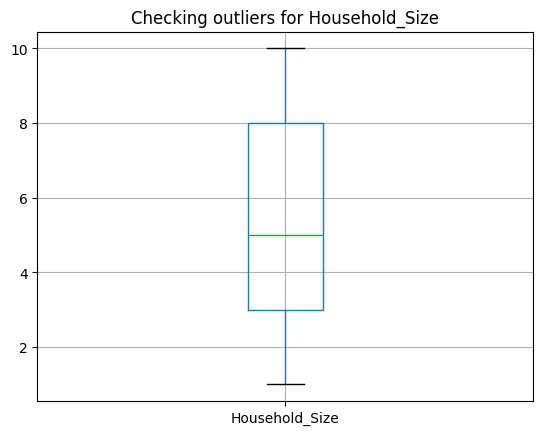

In [88]:
import matplotlib.pyplot as plt
data.boxplot(column='Average_Usage_Days')
plt.title('Checking outliers for Average_Usage_Days')
plt.show()

data.boxplot(column='Household_Size')
plt.title('Checking outliers for Household_Size')
plt.show()

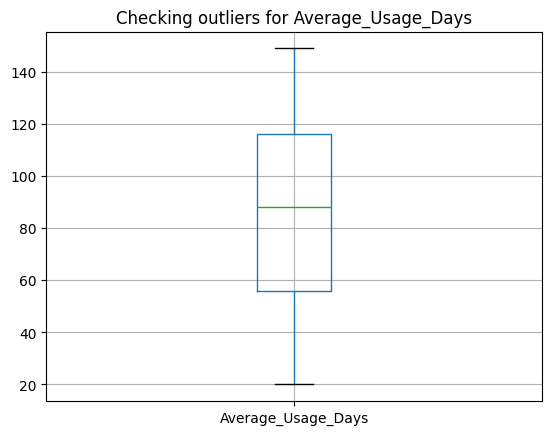

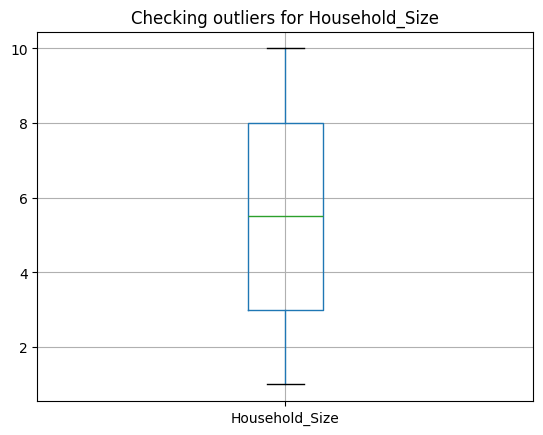

In [90]:
import matplotlib.pyplot as plt
bad_emails.boxplot(column='Average_Usage_Days')
plt.title('Checking outliers for Average_Usage_Days')
plt.show()

bad_emails.boxplot(column='Household_Size')
plt.title('Checking outliers for Household_Size')
plt.show()

In [83]:
data.to_csv('cleaned_fuel_supply_data.csv', index=False)

In [85]:
bad_emails.to_csv('bad_emails_fuel_supply_data.csv', index=False)